<a href="https://colab.research.google.com/github/Jordana-Metzler/Data-Science/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Data Science: *analisando os dados da Liga das Na√ß√µes de v√¥lei feminino 2024*

## Introdu√ß√£o
Neste projeto, analisamos os dados da Liga das Na√ß√µes de V√¥lei Feminino 2024 (VNL 2024) com o objetivo de identificar os principais fundamentos que contribu√≠ram para o desempenho das sele√ß√µes participantes e destacar as jogadoras mais eficientes da competi√ß√£o. Como atleta de v√¥lei, trago minha viv√™ncia esportiva para interpretar os dados e validar as conclus√µes.


## Objetivos
- O que os dados revelam sobre o desempenho das sele√ß√µes do p√≥dio?
- Quais foram as jogadoras mais eficientes?
- Quais fundamentos (ataque, bloqueio, saque, defesa, recep√ß√£o) se destacaram?
- Como cada pa√≠s performou nos fundamentos?
- Como est√£o distribu√≠das as posi√ß√µes em quadra?
- Visualizar os pa√≠ses participantes em um mapa interativo.


In [11]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

In [12]:
# Fazer upload do arquivo CSV baixado do Kaggle (players.csv)
from google.colab import files
uploaded = files.upload()


Saving vnl.csv to vnl (1).csv


In [13]:
df = pd.read_csv("vnl.csv")
df.head(10)

player country  age  attack  block  serve  set    dig  receive position
0        Vargas     TUR   24   20.25   1.62   1.50  0.0   7.75     0.00       OP
1          Koga     JPN   28   17.67   0.78   1.11  0.0  11.22     1.11       OH
2       Van Ryk     CAN   25   16.44   0.89   1.11  0.0  12.56     0.11       OH
3       Li Y.Y.     CHN   24   16.33   0.56   1.00  0.0   8.22     3.56       OH
4          Gray     CAN   30   15.22   0.44   1.00  0.0   9.44     5.56       OH
5         Egonu     ITA   25   14.60   2.40   2.20  0.0   4.20     0.00       OP
6       Stysiak     POL   23   14.12   1.50   0.38  0.0   8.38     0.00       OP
7          Gabi     BRA   30   14.12   0.88   1.12  0.0   9.50     5.25       OH
8      Ishikawa     JPN   24   13.78   0.56   0.56  0.0   7.67     4.11       OH
9  Ana Cristina     BRA   20   12.62   1.38   0.88  0.0   6.75     4.62       OH

In [14]:
#Renomeando colunas para portugu√™s
df.rename(columns={
    "player": "jogadora",
    "country": "pais",
    "age": "idade",
    "attack": "ataque",
    "block": "bloqueio",
    "serve": "saque",
    "set": "levantamento",
    "dig": "defesa",
    "receive": "recepcao",
    "position": "posicao"
}, inplace=True)
df.head(10)

jogadora pais  idade  ataque  bloqueio  saque  levantamento  defesa  recepcao posicao
0        Vargas  TUR     24   20.25      1.62   1.50           0.0    7.75      0.00      OP
1          Koga  JPN     28   17.67      0.78   1.11           0.0   11.22      1.11      OH
2       Van Ryk  CAN     25   16.44      0.89   1.11           0.0   12.56      0.11      OH
3       Li Y.Y.  CHN     24   16.33      0.56   1.00           0.0    8.22      3.56      OH
4          Gray  CAN     30   15.22      0.44   1.00           0.0    9.44      5.56      OH
5         Egonu  ITA     25   14.60      2.40   2.20           0.0    4.20      0.00      OP
6       Stysiak  POL     23   14.12      1.50   0.38           0.0    8.38      0.00      OP
7          Gabi  BRA     30   14.12      0.88   1.12           0.0    9.50      5.25      OH
8      Ishikawa  JPN     24   13.78      0.56   0.56           0.0    7.67      4.11      OH
9  Ana Cristina  BRA     20   12.62      1.38   0.88           0.0    6.75      4.62      OH

In [15]:
#Traduzindo valores da coluna de posi√ß√£o
df["posicao"] = df["posicao"].replace({
    "OH": "Ponteira",
    "OP": "Oposta",
    "MB": "Central",
    "S": "Levantadora",
    "L": "L√≠bero"
})
df.head(10)

jogadora pais  idade  ataque  bloqueio  saque  levantamento  defesa  recepcao   posicao
0        Vargas  TUR     24   20.25      1.62   1.50           0.0    7.75      0.00    Oposta
1          Koga  JPN     28   17.67      0.78   1.11           0.0   11.22      1.11  Ponteira
2       Van Ryk  CAN     25   16.44      0.89   1.11           0.0   12.56      0.11  Ponteira
3       Li Y.Y.  CHN     24   16.33      0.56   1.00           0.0    8.22      3.56  Ponteira
4          Gray  CAN     30   15.22      0.44   1.00           0.0    9.44      5.56  Ponteira
5         Egonu  ITA     25   14.60      2.40   2.20           0.0    4.20      0.00    Oposta
6       Stysiak  POL     23   14.12      1.50   0.38           0.0    8.38      0.00    Oposta
7          Gabi  BRA     30   14.12      0.88   1.12           0.0    9.50      5.25  Ponteira
8      Ishikawa  JPN     24   13.78      0.56   0.56           0.0    7.67      4.11  Ponteira
9  Ana Cristina  BRA     20   12.62      1.38   0.88           0.0    6.75      4.62  Ponteira

In [16]:
#Criando colunas adicionais: pontos totais e jogadora_completa
df["pontos_totais"] = df["ataque"] + df["bloqueio"] + df["saque"]
df["jogadora_completa"] = df["jogadora"] + " (" + df["posicao"] + " - " + df["pais"] + ")"
df.head(10)

jogadora pais  idade  ataque  bloqueio  saque  levantamento  defesa  recepcao   posicao  pontos_totais              jogadora_completa
0        Vargas  TUR     24   20.25      1.62   1.50           0.0    7.75      0.00    Oposta          23.37          Vargas (Oposta - TUR)
1          Koga  JPN     28   17.67      0.78   1.11           0.0   11.22      1.11  Ponteira          19.56          Koga (Ponteira - JPN)
2       Van Ryk  CAN     25   16.44      0.89   1.11           0.0   12.56      0.11  Ponteira          18.44       Van Ryk (Ponteira - CAN)
3       Li Y.Y.  CHN     24   16.33      0.56   1.00           0.0    8.22      3.56  Ponteira          17.89       Li Y.Y. (Ponteira - CHN)
4          Gray  CAN     30   15.22      0.44   1.00           0.0    9.44      5.56  Ponteira          16.66          Gray (Ponteira - CAN)
5         Egonu  ITA     25   14.60      2.40   2.20           0.0    4.20      0.00    Oposta          19.20           Egonu (Oposta - ITA)
6       Stysiak  POL     23   14.12      1.50   0.38           0.0    8.38      0.00    Oposta          16.00         Stysiak (Oposta - POL)
7          Gabi  BRA     30   14.12      0.88   1.12           0.0    9.50      5.25  Ponteira          16.12          Gabi (Ponteira - BRA)
8      Ishikawa  JPN     24   13.78      0.56   0.56           0.0    7.67      4.11  Ponteira          14.90      Ishikawa (Ponteira - JPN)
9  Ana Cristina  BRA     20   12.62      1.38   0.88           0.0    6.75      4.62  Ponteira          14.88  Ana Cristina (Ponteira - BRA)

In [17]:
#Vis√£o geral dos dados por sele√ß√£o
df_paises = df.groupby("pais")[["ataque", "bloqueio", "saque", "defesa", "recepcao", "pontos_totais"]].mean().sort_values("pontos_totais", ascending=False).reset_index()
df_paises

pais    ataque  bloqueio     saque    defesa  recepcao  pontos_totais
0   CHN  4.261538  0.656923  0.360000  3.925385  1.223077       5.278462
1   TUR  4.020000  0.874667  0.376000  3.664667  1.294667       5.270667
2   USA  3.957273  0.745000  0.304545  3.587273  1.234545       5.006818
3   BRA  3.685882  0.890588  0.297059  3.095294  1.019412       4.873529
4   CAN  3.641429  0.547143  0.404286  3.927857  0.841429       4.592857
5   DOM  3.687857  0.586429  0.291429  3.902143  0.900000       4.565714
6   JPN  3.816000  0.414667  0.289333  4.158667  1.206667       4.520000
7   ITA  3.346316  0.727895  0.432105  3.011579  1.000000       4.506316
8   SRB  3.492000  0.657000  0.329000  4.402500  1.825000       4.478000
9   POL  3.324737  0.776316  0.263158  3.160526  0.971053       4.364211
10  GER  3.396875  0.486875  0.408750  3.240000  1.145000       4.292500
11  NED  3.034375  0.575000  0.299375  3.023125  0.910000       3.908750
12  BUL  2.930000  0.413750  0.390000  3.096875  0.883125       3.733750
13  KOR  2.508571  0.460000  0.220714  3.015714  0.690000       3.189286
14  THA  2.802105  0.177368  0.184211  3.191053  1.269474       3.163684
15  FRA  2.321667  0.440556  0.241111  2.567778  1.322778       3.003333

In [18]:
#Pa√≠ses participantes
paises_coords = {
    'Brasil': [-14.2350, -51.9253],
    'Estados Unidos': [37.0902, -95.7129],
    'China': [35.8617, 104.1954],
    'Jap√£o': [36.2048, 138.2529],
    'Pol√¥nia': [51.9194, 19.1451],
    'Turquia': [38.9637, 35.2433],
    'It√°lia': [41.8719, 12.5674],
    'S√©rvia': [44.0165, 21.0059],
    'Alemanha': [51.1657, 10.4515],
    'Tail√¢ndia': [15.8700, 100.9925],
    'Canad√°': [56.1304, -106.3468],
    'Pa√≠ses Baixos': [52.1326, 5.2913],
    'Coreia do Sul': [35.9078, 127.7669],
    'Fran√ßa': [46.6034, 1.8883],
    'Rep√∫blica Dominicana': [18.7357, -70.1627],
    'Bulg√°ria': [42.7339, 25.4858]
}

mapa = folium.Map(location=[20, 0], zoom_start=2)

# Adicionar os marcadores dos pa√≠ses
for pais, coords in paises_coords.items():
    folium.Marker(
        location=coords,
        popup=pais,
        tooltip=pais,
        icon=folium.Icon(color='blue', icon='globe')
    ).add_to(mapa)

# Mostrar o mapa

mapa

In [19]:
#Gr√°fico de fundamentos por pa√≠s
df_paises_melted = df_paises.melt(id_vars="pais", var_name="Fundamento", value_name="M√©dia")
fig = px.bar(df_paises_melted, x="pais", y="M√©dia", color="Fundamento",
             title="M√©dia de Pontua√ß√£o por Fundamento - Por Sele√ß√£o",
             barmode="group", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [33]:
focus = df[df["pais"].isin(["ITA", "JPN", "POL", "BRA"])]
focus_grouped = focus.groupby("pais")[["ataque", "bloqueio", "saque", "defesa", "recepcao"]].mean().reset_index()
focus_melted = focus_grouped.melt(id_vars="pais", var_name="Fundamento", value_name="M√©dia")

fig = px.bar(
    focus_melted,
    x="pais",
    y="M√©dia",
    color="Fundamento",
    title="Comparativo dos Fundamentos: ITA x JPN x POL x BRA",
    barmode="group",
    text="M√©dia"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Destacar o campe√£o (ITA) com cor diferente
fig.update_traces(
    selector=lambda trace: trace.name and "ITA" in trace.name,
    marker_line_width=2,
    marker_line_color="black"
)

fig.show()


In [35]:
# top 10 jogadoras gerais
df["jogadora_completa"] = df["jogadora"] + " (" + df["posicao"] + " - " + df["pais"] + ")"
top10_geral = df.sort_values("pontos_totais", ascending=False).head(10)

fig = px.bar(
    top10_geral,
    x="pontos_totais",
    y="jogadora_completa",
    color="pais",
    orientation='h',
    title="Top 10 Jogadoras - Pontua√ß√£o Total",
    text="pontos_totais",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()


In [22]:
#Top 5 por ataque
top_ataque = df.sort_values("ataque", ascending=False).head(5)
fig = px.bar(top_ataque, x="ataque", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Ataque",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [23]:
# Top 5 por Bloqueio
top_bloqueio = df.sort_values("bloqueio", ascending=False).head(5)
fig = px.bar(top_bloqueio, x="bloqueio", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Bloqueio",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [24]:
# Top 5 por Saque
top_saque = df.sort_values("saque", ascending=False).head(5)
fig = px.bar(top_saque, x="saque", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Saque",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [25]:
# Top 5 por Defesa
top_defesa = df.sort_values("defesa", ascending=False).head(5)
fig = px.bar(top_defesa, x="defesa", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Defesa",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [26]:
#Top 5 por Recep√ß√£o
top_recepcao = df.sort_values("recepcao", ascending=False).head(5)
fig = px.bar(top_recepcao, x="recepcao", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Recep√ß√£o",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [37]:
opcoes = sorted(df['posicao'].dropna().unique())

@widgets.interact(posicao=widgets.Dropdown(options=opcoes, description='Posi√ß√£o:'))
def mostrar_quantidade(posicao):
    clear_output(wait=True)
    print(f"Quantidade de jogadoras na posi√ß√£o '{posicao}': {df[df['posicao'] == posicao].shape[0]}")


interactive(children=(Dropdown(description='Posi√ß√£o:', options=('Central', 'Levantadora', 'L√≠bero', 'Oposta', ‚Ä¶

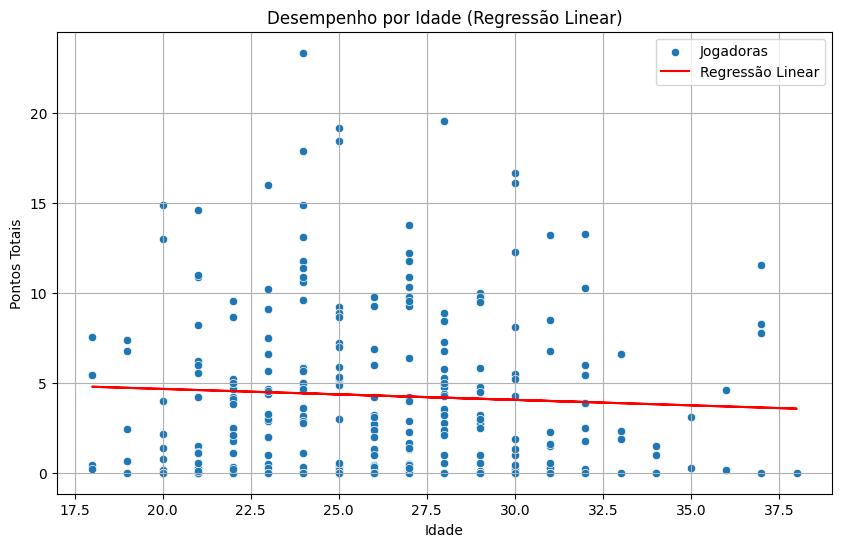

Equa√ß√£o: Pontos Totais = -0.06 * Idade + 5.88


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Remover valores ausentes nas colunas usadas
df_reg = df[['idade', 'pontos_totais']].dropna()

# Separar vari√°veis independentes e dependentes
X = df_reg[['idade']]
y = df_reg['pontos_totais']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever valores
y_pred = modelo.predict(X)

# Plotar gr√°fico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='pontos_totais', data=df_reg, label='Jogadoras')
plt.plot(df_reg['idade'], y_pred, color='red', label='Regress√£o Linear')
plt.xlabel("Idade")
plt.ylabel("Pontos Totais")
plt.title("Desempenho por Idade (Regress√£o Linear)")
plt.legend()
plt.grid(True)
plt.show()

# Exibir equa√ß√£o da reta
print(f"Equa√ß√£o: Pontos Totais = {modelo.coef_[0]:.2f} * Idade + {modelo.intercept_:.2f}")


### üìå An√°lise: Rela√ß√£o entre Idade e Desempenho (Pontos Totais)

Com base na regress√£o linear aplicada aos dados da Liga das Na√ß√µes Feminina de V√¥lei 2024, obteve-se a seguinte equa√ß√£o:

Pontos Totais = -0.06 √ó Idade + 5.88


O coeficiente angular negativo indica uma leve tend√™ncia de queda no desempenho √† medida que a idade aumenta. No entanto, essa influ√™ncia √© extremamente pequena ‚Äî cerca de 0,06 pontos a menos por ano ‚Äî o que a torna estatisticamente irrelevante para fins pr√°ticos. Isso sugere que a idade, por si s√≥, **n√£o √© um fator determinante no desempenho ofensivo** das atletas nesta competi√ß√£o. Jogadoras jovens e experientes apresentam desempenhos semelhantes em termos de pontua√ß√£o, indicando que **outros fatores**, como **posi√ß√£o, tempo em quadra, condicionamento f√≠sico e papel t√°tico**, exercem maior influ√™ncia nos resultados individuais.


## üìä An√°lise: Os dados confirmam o p√≥dio da VNL 2024?

Com base nas estat√≠sticas da Liga das Na√ß√µes de V√¥lei Feminino 2024, os dados confirmam o merecido p√≥dio composto por **It√°lia**, **Jap√£o** e **Pol√¥nia**. A **It√°lia** apresentou o desempenho mais equilibrado em todos os fundamentos, enquanto o **Jap√£o** liderou com folga os fundamentos defensivos, que caracterizam o estilo de jogo, e a **Pol√¥nia**, por sua vez, teve um desempenho s√≥lido especialmente nos bloqueios.

J√° a **sele√ß√£o brasileira**, apesar de figurar entre as melhores em **ataques** e **saques**, teve um baixo aproveitamento nos **fundamentos defensivos** o que comprometeu seu rendimento, resultando na **4¬™ coloca√ß√£o**.

Nos destaques individuais, **Egonu (ITA)** lidera em pontos, **Inoue** e **Kojima (JPN)** se sobressaem na recep√ß√£o e defesa, e **Korneluk (POL)** no bloqueio. A an√°lise mostra que **consist√™ncia nos fundamentos** foi o diferencial decisivo para o sucesso das equipes no torneio.


## üèÖ Comparando a Sele√ß√£o Ideal com a Sele√ß√£o Oficial da VNL 2024

Al√©m da an√°lise por pa√≠s e fundamentos, tamb√©m √© poss√≠vel observar os destaques individuais da competi√ß√£o. A Federa√ß√£o Internacional de Voleibol (FIVB) seleciona, ao final do torneio, uma **sele√ß√£o do campeonato**, composta pelas atletas que mais se destacaram tecnicamente e taticamente em suas posi√ß√µes.

Neste projeto, com base nos dados estat√≠sticos da VNL 2024, constru√≠mos uma **sele√ß√£o ideal baseada em desempenho quantitativo**.

A seguir, comparamos essa sele√ß√£o ideal com a **sele√ß√£o oficial divulgada pela FIVB**, refletindo sobre as semelhan√ßas e diferen√ßas entre desempenho num√©rico e impacto real dentro da competi√ß√£o.

In [45]:
import pandas as pd
import plotly.graph_objects as go

dados = {
    "Posi√ß√£o": ["Levantadora", "Oposta", "Ponteira ", "Ponteira ", "Central ", "Central ", "L√≠bero"],
    "Ideal": [
        "Alessia Orro (ITA)", "Paola Egonu (ITA)", "Gabi Guimar√£es (BRA)",
        "Arisa Inoue (JPN)", "Agnieszka Korneluk (POL)", "Sarah Fahr (ITA)",
        "Manami Kojima (JPN)"
    ],
    "Oficial": [
        "Alessia Orro (ITA)", "Paola Egonu (ITA)", "Myriam Sylla (ITA)",
        "Sarina Koga (JPN)", "Sarah Fahr (ITA)", "Agnieszka Korneluk (POL)",
        "Manami Kojima (JPN)"
    ]
}

df = pd.DataFrame(dados)

# Gerar lista de cores para cada c√©lula (lavender se iguais, pink se diferentes)
cores = [
    ['lavender'] * len(df)] + [
    ['lavender' if i == j else 'mistyrose' for i, j in zip(df['Ideal'], df['Oficial'])]
]

# Criar tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color=cores,
               align='center'))
])

fig.update_layout(
    title="Comparativo: Sele√ß√£o Ideal x Sele√ß√£o Oficial da VNL 2024",
    height=380,
    margin=dict(l=20, r=20, t=50, b=100)
)
fig.show()


### üß† Conclus√£o da Compara√ß√£o

A an√°lise mostra que, em grande parte, a **sele√ß√£o oficial da VNL 2024 coincide com os dados** estat√≠sticos. Nomes como **Paola Egonu**, **Alessia Orro**, **Sarah Fahr** e **Agnieszka Korneluk** aparecem em ambas as sele√ß√µes, confirmando seus desempenhos de destaque.

As principais **diferen√ßas** aparecem nas escolhas de ponteiras: enquanto os dados apontam para **Gabi Guimar√£es (BRA)** e **Arisa Inoue (JPN)** como mais eficientes em pontua√ß√£o e regularidade, a sele√ß√£o oficial optou por **Myriam Sylla (ITA)** e **Sarina Koga (JPN)**.

Essa compara√ß√£o refor√ßa que **a performance estat√≠stica √© essencial**, mas **a escolha da sele√ß√£o oficial tamb√©m leva em conta aspectos subjetivos** e qualitativos, como equil√≠brio t√°tico, protagonismo em jogos decisivos e contribui√ß√£o coletiva para o sucesso da equipe.
